## Camshift Object Tracking

In [31]:
import numpy as np
import cv2

# Initialize webcam
cap = cv2.VideoCapture('images/walking.avi')

# take first frame of the video
ret, frame = cap.read()

# setup default location of window
r, h, c, w = 240, 100, 400, 160 
track_window = (c, r, w, h)

# Crop region of interest for tracking
roi = frame[r:r+h, c:c+w]

# Convert cropped window to HSV color space
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Create a mask between the HSV bounds
lower_purple = np.array([30,60,60])
upper_purple = np.array([175,255,255])
mask = cv2.inRange(hsv_roi, lower_purple, upper_purple)

# Obtain the color histogram of the ROI
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])

# Normalize values to lie between the range 0, 255
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Setup the termination criteria
# We stop calculating the centroid shift after ten iterations 
# or if the centroid has moved at least 1 pixel
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    
    # Read webcam frame
    ret, frame = cap.read()

    if ret == True:
        # Convert to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Calculate the histogram back projection 
        # Each pixel's value is it's probability
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply Camshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image 
        # We use polylines to represent Adaptive box 
        #print(pts)
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        
        cv2.imshow('Camshift Tracking', img2)
        
        if cv2.waitKey(1) == 13: #13 is the Enter Key
            break

    else:
        break

cv2.destroyAllWindows()
cap.release()

[[245 171]
 [748 186]
 [743 332]
 [240 317]]
[[328 212]
 [519 197]
 [526 285]
 [335 300]]
[[277 218]
 [504 197]
 [511 277]
 [284 298]]
[[259 213]
 [509 201]
 [513 281]
 [263 293]]
[[260 211]
 [527 203]
 [530 282]
 [263 290]]
[[238 210]
 [529 203]
 [531 283]
 [240 290]]
[[232 209]
 [543 204]
 [544 284]
 [233 289]]
[[245 205]
 [597 204]
 [597 287]
 [245 288]]
[[226 208]
 [614 199]
 [616 285]
 [228 294]]
[[224 201]
 [673 200]
 [673 293]
 [224 294]]
[[301 179]
 [767 210]
 [759 328]
 [293 297]]
[[328 166]
 [792 225]
 [775 358]
 [311 299]]
[[357 159]
 [796 233]
 [772 376]
 [333 302]]
[[367 154]
 [800 229]
 [774 382]
 [341 307]]
[[377 149]
 [800 230]
 [770 389]
 [347 308]]
[[389 147]
 [796 220]
 [766 386]
 [359 313]]
[[396 143]
 [795 210]
 [765 386]
 [366 319]]
[[404 144]
 [779 193]
 [755 381]
 [380 332]]
[[396 154]
 [760 132]
 [773 344]
 [409 366]]
[[409 146]
 [761 121]
 [776 343]
 [424 368]]
[[402 154]
 [754 109]
 [783 334]
 [431 379]]
[[405 149]
 [758 106]
 [786 336]
 [433 379]]
[[404 153]

In [6]:
track_window

(242, 178, 505, 148)

In [7]:
pts

array([[245, 171],
       [748, 186],
       [743, 332],
       [240, 317]], dtype=int64)

In [15]:
dst[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
import matplotlib.pyplot as plt


(array([173.,   0.,   2.,   0.,   0.,   3.,   0.,   1.,   0.,   1.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

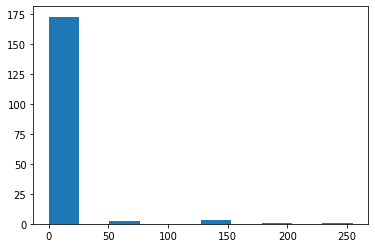

In [30]:
plt.hist(roi_hist)